In [1]:
#SCRIPT PARA ANÁLISE BÁSICA DOS DADOS DE CANDIDATOS(AS) A VEREADOR(A) NO TERRITÓRIO NACIONAL
#DATASET OBTIDO DO REPOSITÓRIO DE DADOS ABERTOS DO TRIBUNAL SUPERIOR ELEITORAL
#DATASET HOSPEDADO NO GITHUB PARA FACILITAR IMPORTAÇÃO

#COMO USAR:
#Clique em "Run" e informe sua cidade com caracteres acentuados caso houver. Informe também o estado

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
ufs_norte = ['AC','AM','AP','PA','RO','RR','TO']
ufs_nordeste = ['AL','BA','CE','MA','PB','PE','PI','RN','SE']
ufs_centro_oeste = ['GO','MS','MT'] #sem DF porque não elege vereadores
ufs_sudeste = ['ES','MG','RJ','SP']
ufs_sul = ['PR','RS','SC']
prefixo = 'https://raw.githubusercontent.com/elmoneto/analise-dados-tse/master/vereadores-2020/dataset/consulta_cand_2020_'

In [4]:
cidade = input('Informe o nome da cidade: ').upper()
estado = input('Informe a sigla do estado: ').upper()

Informe o nome da cidade: palmeira do piauí
Informe a sigla do estado: pi


In [6]:
arquivo = prefixo + estado + '.csv'
dados = pd.read_csv(arquivo, sep=';', encoding="latin_1")

In [7]:
dados = dados.query("NM_UE == '{}' & SG_UF == '{}' & DS_CARGO == 'VEREADOR'".format(cidade,estado))

dados[["NM_CANDIDATO","DS_OCUPACAO","DS_CARGO"]].head(30)

,NM_CANDIDATO,DS_OCUPACAO,DS_CARGO
318,EDERSON TELES FEITOSA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",VEREADOR
1579,JACIARA DE SOUSA NASCIMENTO,OUTROS,VEREADOR
1766,CRISTIANO DA SILVA SANTOS,OUTROS,VEREADOR
1924,LEONARDO ROQUE MARTINS,VEREADOR,VEREADOR
2575,CARLOS SERGIO ALMEIDA DA LUZ,VEREADOR,VEREADOR
2683,SERGIVALDO MENDES DA SILVA,OUTROS,VEREADOR
3220,RAIMUNDO ALVES DOS SANTOS FERREIRA,POLICIAL MILITAR,VEREADOR
3293,ENEDINA SANTOS,OUTROS,VEREADOR
3962,JOSE WILTON BORGES DA ROCHA,VEREADOR,VEREADOR
5585,GILSON DA ROCHA MARTINS,AGRICULTOR,VEREADOR


In [8]:
rotulos_instrucao = dados["DS_GRAU_INSTRUCAO"].unique().tolist()
df_instrucao_masculino = dados.query("DS_GENERO == 'MASCULINO'")
df_instrucao_feminino = dados.query("DS_GENERO == 'FEMININO'")
s_instrucao_masculino = df_instrucao_masculino["DS_GRAU_INSTRUCAO"].value_counts().sort_index()
s_instrucao_feminino = df_instrucao_feminino["DS_GRAU_INSTRUCAO"].value_counts().sort_index()

for item in rotulos_instrucao:
    if item not in s_instrucao_feminino.index.values.tolist():
        s = pd.Series([0], index=[item])
        s_instrucao_feminino = s_instrucao_feminino.append(s)
        
for item in rotulos_instrucao:
    if item not in s_instrucao_masculino.index.values.tolist():
        s = pd.Series([0], index=[item])
        s_instrucao_masculino = s_instrucao_masculino.append(s)        

index_instrucao= ['SUPERIOR COMPLETO','SUPERIOR INCOMPLETO','ENSINO MÉDIO COMPLETO','ENSINO MÉDIO INCOMPLETO',
             'ENSINO FUNDAMENTAL COMPLETO','ENSINO FUNDAMENTAL INCOMPLETO','LÊ E ESCREVE']
s_instrucao_masculino = s_instrucao_masculino.reindex(index_instrucao)
s_instrucao_feminino = s_instrucao_feminino.reindex(index_instrucao)

l_instrucao_masculino = []
l_instrucao_feminino = []
for item in s_instrucao_masculino:
    percent = round(item*100 / s_instrucao_masculino.sum(),1)
    l_instrucao_masculino.append(percent)
for item in s_instrucao_feminino:
    percent = round(100*item / s_instrucao_feminino.sum(),1)
    l_instrucao_feminino.append(percent)


GRAU DE INSTRUÇÃO DE CANDIDATOS:
-------------------------------
SUPERIOR COMPLETO                2.0
SUPERIOR INCOMPLETO              NaN
ENSINO MÉDIO COMPLETO            3.0
ENSINO MÉDIO INCOMPLETO          2.0
ENSINO FUNDAMENTAL COMPLETO      4.0
ENSINO FUNDAMENTAL INCOMPLETO    1.0
LÊ E ESCREVE                     1.0
Name: DS_GRAU_INSTRUCAO, dtype: float64


GRAU DE INSTRUÇÃO DE CANDIDATAS:
-------------------------------
SUPERIOR COMPLETO                1.0
SUPERIOR INCOMPLETO              NaN
ENSINO MÉDIO COMPLETO            4.0
ENSINO MÉDIO INCOMPLETO          0.0
ENSINO FUNDAMENTAL COMPLETO      1.0
ENSINO FUNDAMENTAL INCOMPLETO    0.0
LÊ E ESCREVE                     1.0
dtype: float64




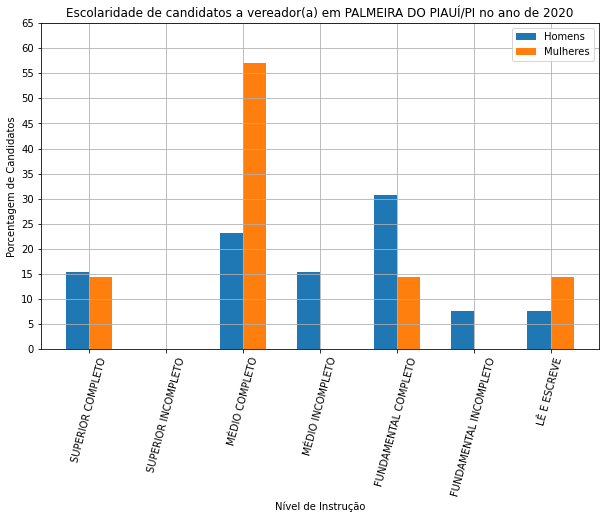

In [9]:
print("GRAU DE INSTRUÇÃO DE CANDIDATOS:")
print("-------------------------------")
print(s_instrucao_masculino)
print("\n")


print("GRAU DE INSTRUÇÃO DE CANDIDATAS:")
print("-------------------------------")
print(s_instrucao_feminino)
print("\n")
rotulos = []
for index in index_instrucao:
    rotulos.append(index.replace("ENSINO ",""))
x = np.arange(len(index_instrucao))
y = np.arange(0,max([max(l_instrucao_masculino),max(l_instrucao_feminino)])+10,5)
largura = 0.30 
fig, ax = plt.subplots()
rects1 = ax.bar(x - largura/2, l_instrucao_masculino, largura, label='Homens')
rects2 = ax.bar(x + largura/2, l_instrucao_feminino, largura, label='Mulheres')
ax.set_ylabel('Porcentagem de Candidatos')
ax.set_xlabel('Nível de Instrução')
ax.set_title('Escolaridade de candidatos a vereador(a) em {}/{} no ano de 2020'.format(cidade,estado))
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(rotulos)
plt.xticks(rotation=75)
ax.legend()
plt.grid()
fig.set_figheight(6)
fig.set_figwidth(10)


Identificação de gênero dos(as) candidatos(as)
MASCULINO    119
FEMININO      66
Name: DS_GENERO, dtype: int64


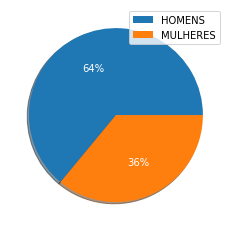

In [12]:
s_genero = dados["DS_GENERO"].value_counts()
print("Identificação de gênero dos(as) candidatos(as)")
print(s_genero)
l_genero_percent = []
l_genero_percent.append(round(s_genero["MASCULINO"]*100 / s_genero.sum(),0))
l_genero_percent.append(round(s_genero["FEMININO"]*100 / s_genero.sum(),0))
plt.pie(x=l_genero_percent,labels=["HOMENS","MULHERES"],autopct='%1.f%%',shadow=True, textprops={'color':"w"})
plt.legend()

Identificação Racial dos(as) Candidatos(as)
BRANCA    167
PRETA      13
PARDA       5
Name: DS_COR_RACA, dtype: int64


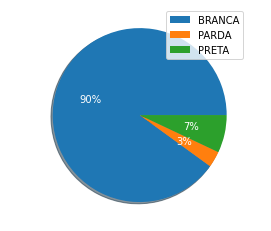

In [13]:
rotulos_raca = dados["DS_COR_RACA"].unique()
print("Identificação Racial dos(as) Candidatos(as)")
s_raca = dados["DS_COR_RACA"].value_counts()
print(s_raca)
l_raca_percent = []

for item in rotulos_raca:
    l_raca_percent.append(round( s_raca[item]*100 / s_raca.sum(),0))

plt.pie(x=l_raca_percent,labels=rotulos_raca,autopct='%1.f%%',shadow=True, textprops={'color':"w"})
plt.legend()

In [14]:
print("20 profissões mais comuns entre os(as) candidatos(as)\n")
print(dados["DS_OCUPACAO"].value_counts().head(20))

20 profissões mais comuns entre os(as) candidatos(as)

OUTROS                                                                    23
DONA DE CASA                                                              18
EMPRESÁRIO                                                                15
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                                      12
ADVOGADO                                                                  10
SERVIDOR PÚBLICO MUNICIPAL                                                 8
AGRICULTOR                                                                 7
TAXISTA                                                                    5
PROFESSOR DE ENSINO FUNDAMENTAL                                            5
PROFESSOR E INSTRUTOR DE FORMAÇÃO PROFISSIONAL                             4
TÉCNICO CONTABILIDADE, ESTATÍSTICA, ECONOMIA DOMÉSTICA E ADMINISTRAÇÃO     4
VEREADOR                                                                   4
MILITAR REFORMADO    